In [16]:
import numpy as np 
import pandas as pd 
#load dataset 
cityFeats = pd.read_csv('/content/Capital_City_Fates.csv')
cityFeats


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [17]:
#check info
cityFeats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [18]:
#describe 
cityFeats.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [19]:
#categorical and continuous variables
categorical_data = cityFeats.select_dtypes(include=['object']) 
categorical_data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train


In [20]:
#check for missimg values 
cityFeats.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [21]:
for i in cityFeats.columns:
  print (cityFeats[i].value_counts())

b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64
c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64
c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64
b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: education_num_bin, dtype: int64
b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: education_bin, dtype: int64
b. income       46012
a. no income     2830
Name: workclass_bin, dtype: int64
e. 40-55             13963
a. 0-25               9627
c. 31-35 & 61-70      9291
d. 36-40 

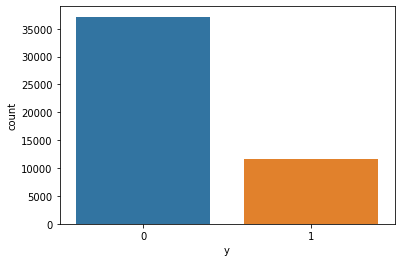

In [22]:
#visualizations
import seaborn as sns
sns.countplot(x = cityFeats['y'],label="Count")

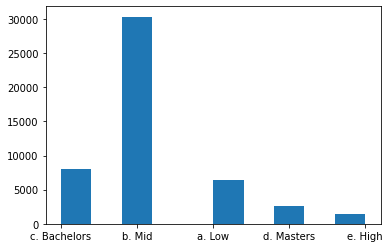

In [23]:
import matplotlib.pyplot as plt
plt.hist(cityFeats.education_bin)
plt.show()

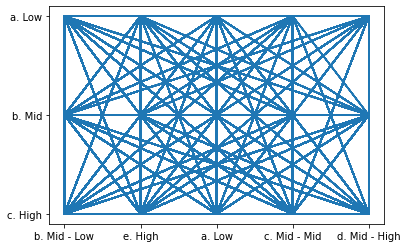

In [24]:
plt.plot(cityFeats.occupation_bin, cityFeats.race_sex_bin)
plt.show()


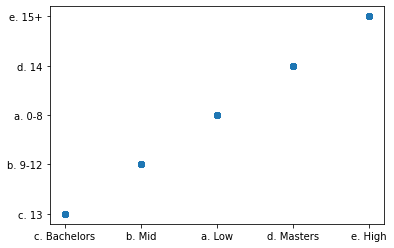

In [25]:
plt.scatter(cityFeats.education_bin, cityFeats.education_num_bin)
plt.show()

In [26]:
#separate dependent and independent variables 
#x = cityFeats.drop(columns='y')
#y = cityFeats['y']

In [27]:
#split data using label
train = cityFeats[cityFeats['flag']=='train']
train


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,b. 31-40,d. Mid - High,c. High,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,train,0
32557,b. 31-40,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,1
32558,b. 31-40,b. Mid - Low,b. Mid,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
32559,a. 0-30,b. Mid - Low,a. Low,a. = 0,c. High,b. 9-12,b. Mid,b. income,a. 0-25,train,0


In [28]:
test = cityFeats[cityFeats['flag']=='test']
test

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,0
32562,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,0
32563,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1
32564,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,test,1
32565,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25,test,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [31]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [32]:
x_train = train.drop('y', axis = 1)
y_train = train['y']

x_test = test.drop('y', axis = 1)
y_test = test['y']

In [33]:
#training and testing: Logistic regression 
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
#fit model
log_model.fit(x_train, y_train) 



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
log_model_train = log_model.predict(x_train)

In [34]:
#predict
log_model_pred = log_model.predict(x_test)

In [42]:
names = []
for i, j in enumerate(x_train.columns):
    names.append(f'X{i}')
    

x_train.rename(columns = dict(zip(x_train.columns, names)), inplace = True)

In [47]:
names = []
for i, j in enumerate(x_test.columns):
    names.append(f'X{i}')
    

x_test.rename(columns = dict(zip(x_test.columns, names)), inplace = True)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36
32561,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
32562,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
32563,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
32564,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
32565,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
48838,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
48839,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
48840,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


In [44]:
#xgboost 
import xgboost as xgb 
xgb = xgb.XGBClassifier()
#fit model
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
#predict train 
xgb_pred_train = xgb.predict(x_train)

In [60]:
#predict test
xgb_predict = xgb.predict(x_test)

In [52]:
#logistic regression for train set 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
train_cm1 = confusion_matrix(log_model_train, y_train)
train_ps1 = precision_score(log_model_train, y_train)
train_rs1 = recall_score(log_model_train, y_train)
train_as1 = accuracy_score(log_model_train, y_train)

print(train_cm1)
print(train_ps1)
print(train_rs1)
print(train_as1)


[[23063  3416]
 [ 1657  4425]]
0.5643412829996174
0.7275567247615916
0.8442001167040324


In [54]:
#logistic test set 
test_cm1 = confusion_matrix(log_model_pred, y_test)
test_ps1 = precision_score(log_model_pred, y_test)
test_rs1 = recall_score(log_model_pred, y_test)
test_as1 = accuracy_score(log_model_pred, y_test)

print(test_cm1)
print(test_ps1)
print(test_rs1)
print(test_as1)


[[11601  1667]
 [  834  2179]]
0.5665626625065002
0.7231994689678062
0.8463853571647934


In [63]:
#xgb train 
train_cm2 = confusion_matrix(xgb_pred_train, y_train)
train_ps2 = precision_score(xgb_pred_train, y_train)
train_rs2 = recall_score(xgb_pred_train, y_train)
train_as2 = accuracy_score(xgb_pred_train, y_train)
print(train_cm2)
print(train_ps2)
print(train_rs2)
print(train_as2)

[[23013  3328]
 [ 1707  4513]]
0.5755643412829996
0.7255627009646303
0.8453671570283467


In [65]:
#xgb test 
test_cm2 = confusion_matrix(xgb_predict, y_test)
test_ps2 = precision_score(xgb_predict, y_test)
test_rs2 = recall_score(xgb_predict, y_test)
test_as2 = accuracy_score(xgb_predict, y_test)
print(test_cm2)
print(test_ps2)
print(test_rs2)
print(test_as2)


[[11576  1626]
 [  859  2220]]
0.5772230889235569
0.7210133160116922
0.8473680977826915
